# Model Fitness (SPRINT 13)

## Abrir el archivo de datos y leer la información general

In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Leemos los conjuntos de datos en varios DataFrames
gym = pd.read_csv('/datasets/gym_churn_us.csv', delimiter = ",")
print(gym.head())

   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0  

## Preparar los datos para el análisis

**Estadística Descriptiva**

In [3]:
# Imprimimos la estadística descriptiva del df "gym"
print("DATAFRAME EVENT")
print(gym.head())
print("----------------------------------------------------------------")
print(gym.info())
print("----------------------------------------------------------------")
print(gym.describe())

DATAFRAME EVENT
   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_curr

**Comprobación de tipos de datos y valores ausentes**

**Tipos de datos**

In [4]:
# Convierte los datos en los tipos necesarios
# Primero inspeccionamos los tipos actuales
print(gym.dtypes)

gender                                 int64
Near_Location                          int64
Partner                                int64
Promo_friends                          int64
Phone                                  int64
Contract_period                        int64
Group_visits                           int64
Age                                    int64
Avg_additional_charges_total         float64
Month_to_end_contract                float64
Lifetime                               int64
Avg_class_frequency_total            float64
Avg_class_frequency_current_month    float64
Churn                                  int64
dtype: object


Todas las columnas tienen bien su tipo de dato

**Datos Ausentes**

In [5]:
# Revisamos y eliminamos duplicados
print(gym.isnull().sum())

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


No existen datos ausentes en la BD

## Análisis Exploratorio de Datos (EDA)

In [6]:
# Revisar datos faltantes
print("Valores faltantes por columna:")
print(gym.isnull().sum())

Valores faltantes por columna:
gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


In [7]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(gym.describe())


Estadísticas descriptivas:
            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25% 

In [8]:
# Comparación entre clientes que cancelaron (Churn=1) y los que no (Churn=0)
grouped_stats = gym.groupby("Churn").mean()
print("\nValores medios por grupo:")
print(grouped_stats)


Valores medios por grupo:
         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0       

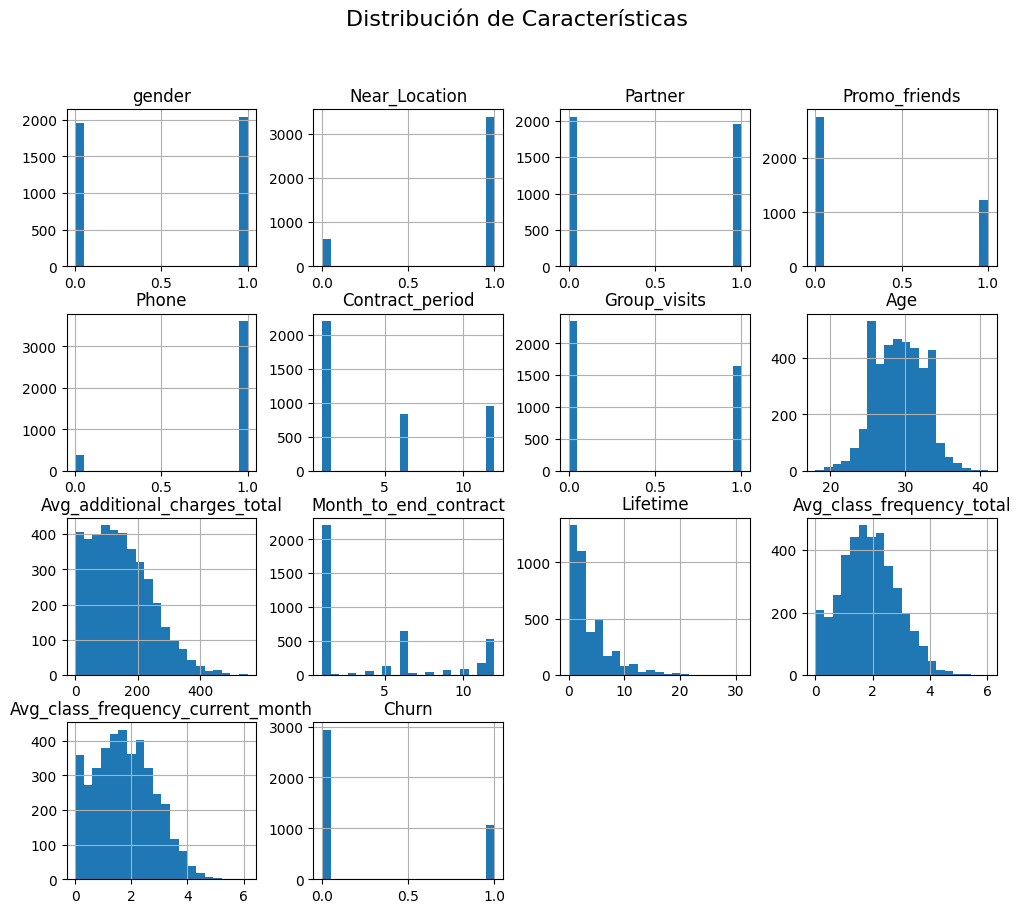

In [9]:
# Histogramas de características relevantes
gym.hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribución de Características", fontsize=16)
plt.show()

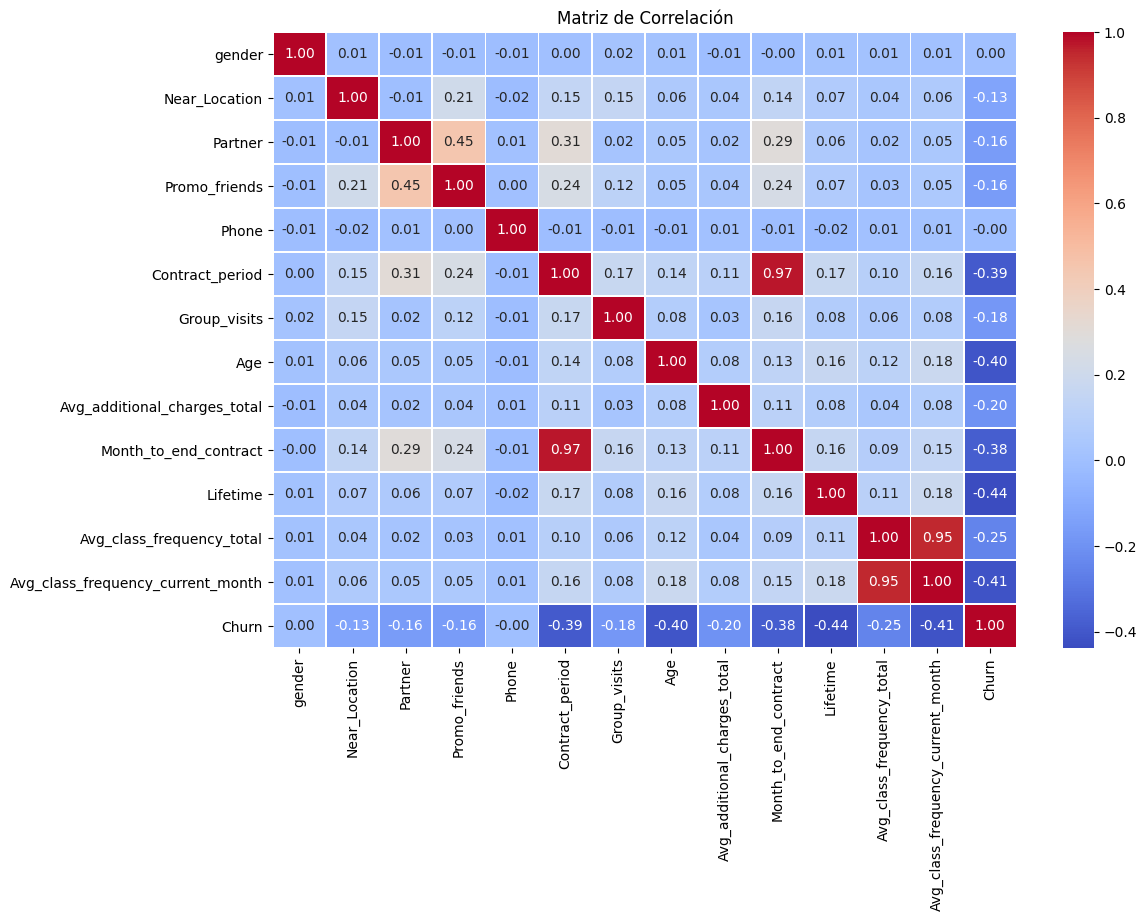

In [10]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(gym.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

## Construir un modelo para predecir la cancelación de usuarios

In [11]:
# Definir características (X) y variable objetivo (y)
X = gym.drop(columns=["Churn"])  # Excluir la variable objetivo
y = gym["Churn"]

# Dividir en conjuntos de entrenamiento (80%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Estandarizar características numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [13]:
# Entrenar Regresión Logística
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)

# Entrenar Bosque Aleatorio
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

In [14]:
# Evaluación de modelos
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(f"Exactitud: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisión: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(classification_report(y_true, y_pred))

evaluate_model(y_val, y_pred_logreg, "Regresión Logística")
evaluate_model(y_val, y_pred_rf, "Bosque Aleatorio")


Regresión Logística Performance:
Exactitud: 0.9163
Precisión: 0.8729
Recall: 0.7822
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       598
           1       0.87      0.78      0.83       202

    accuracy                           0.92       800
   macro avg       0.90      0.87      0.89       800
weighted avg       0.91      0.92      0.91       800


Bosque Aleatorio Performance:
Exactitud: 0.9100
Precisión: 0.8495
Recall: 0.7822
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       598
           1       0.85      0.78      0.81       202

    accuracy                           0.91       800
   macro avg       0.89      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800



La Regresión Logística es el mejor modelo en este caso. Tiene una mayor exactitud y precisión que el modelo de Bosque Aleatorio, mientras que ambos tienen el mismo recall. Si tu prioridad es evitar falsos negativos, la regresión logística es la opción más confiable en este contexto.

## Crear clústeres de usuarios/as

In [15]:
# Eliminar la columna de 'Churn' para crear clústeres sin la variable objetivo
X_clustering = gym.drop(columns=["Churn"])

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Crear una matriz de distancias utilizando linkage()
Z = linkage(X_scaled, method="ward")

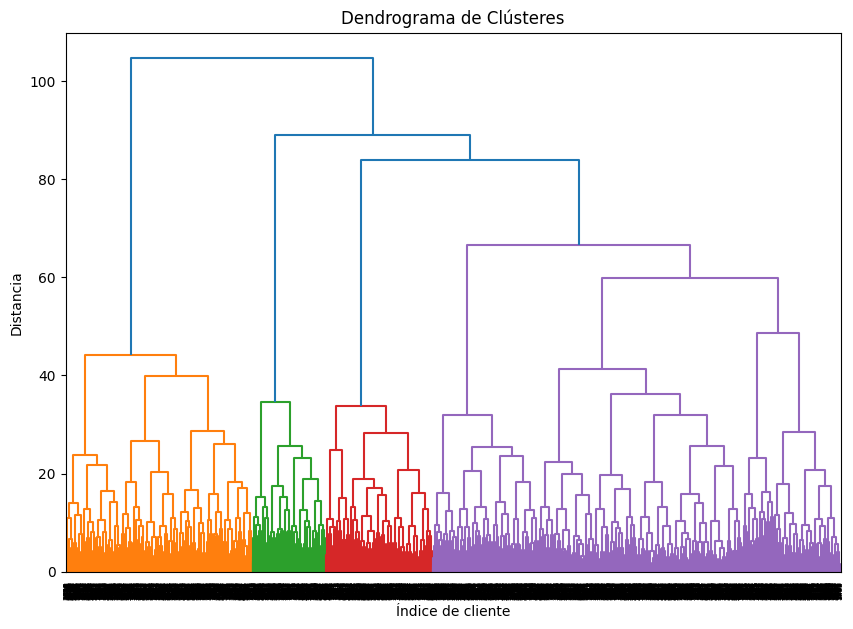

In [16]:
# Traza el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrograma de Clústeres")
plt.xlabel("Índice de cliente")
plt.ylabel("Distancia")
plt.show()

# Establecer el número de clústeres a 5 (basado en el dendrograma)
kmeans = KMeans(n_clusters=5, random_state=42)
gym['Cluster'] = kmeans.fit_predict(X_scaled)

# Calcular los valores medios por clúster
cluster_means = gym.groupby('Cluster').mean()


Promedio de características por clúster:
           gender  Near_Location   Partner  Promo_friends  Phone  \
Cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                            

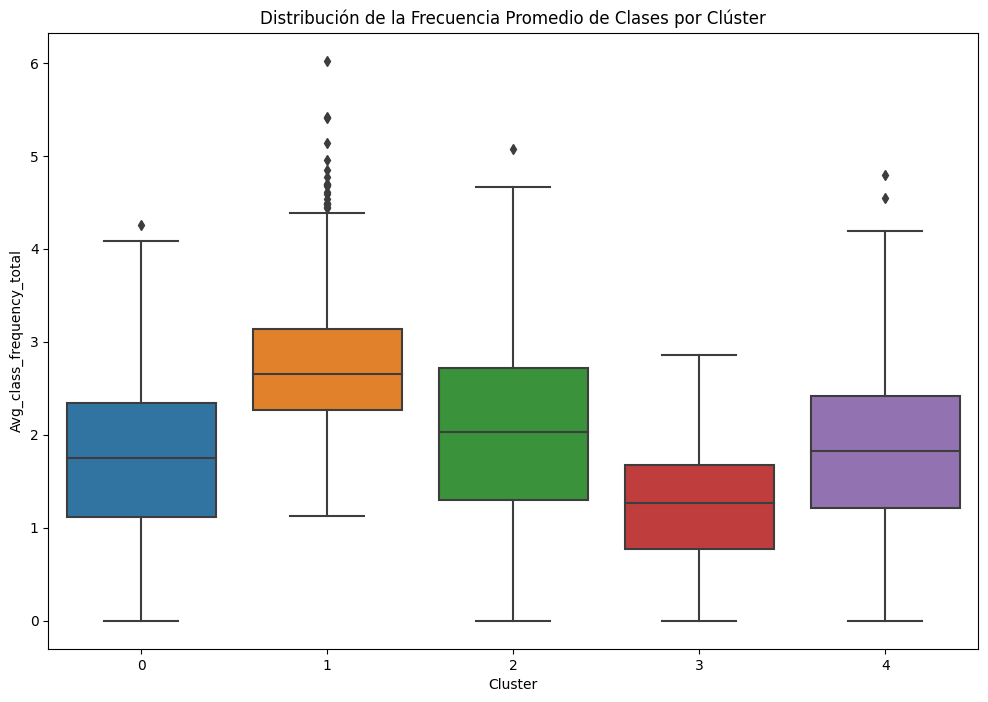

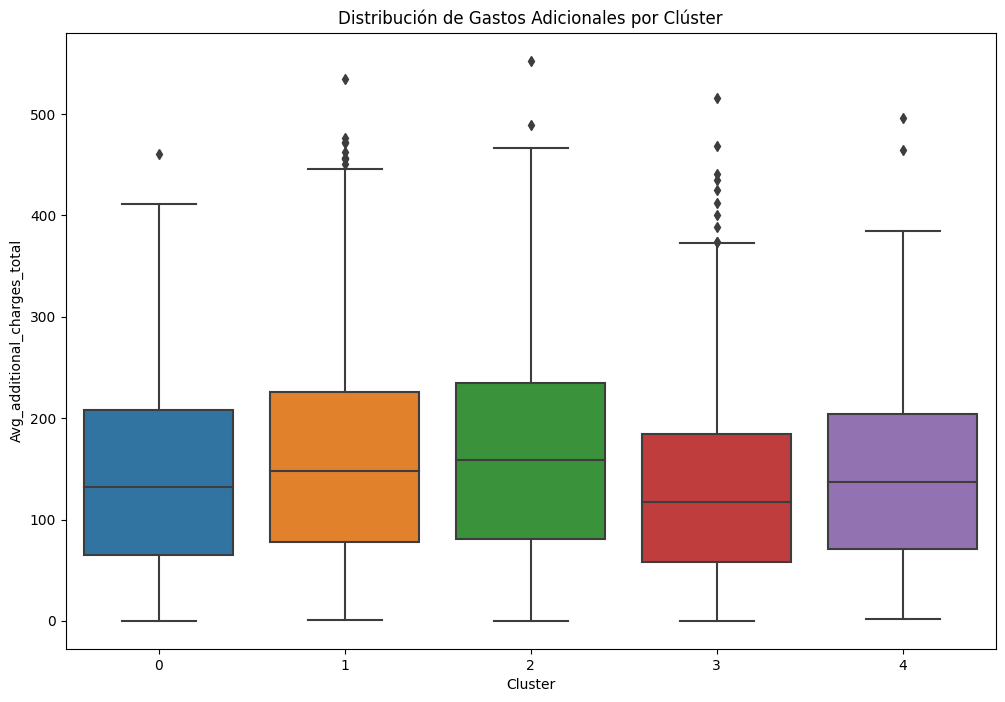

In [17]:
# Ver los valores medios de cada característica por clúster
print("\nPromedio de características por clúster:")
print(cluster_means)

# Traza distribuciones de características para los clústeres
plt.figure(figsize=(12, 8))
sns.boxplot(x="Cluster", y="Avg_class_frequency_total", data=gym)
plt.title("Distribución de la Frecuencia Promedio de Clases por Clúster")
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x="Cluster", y="Avg_additional_charges_total", data=gym)
plt.title("Distribución de Gastos Adicionales por Clúster")
plt.show()

In [18]:
# Calcular la tasa de cancelación por clúster
cancelation_rate_by_cluster = gym.groupby("Cluster")["Churn"].mean()

print("\nTasa de Cancelación por Clúster:")
print(cancelation_rate_by_cluster)


Tasa de Cancelación por Clúster:
Cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64


## Conclusiones

**1. Clústeres con alta tasa de cancelación**


Del análisis podemos observar que los clientes en los clústeres 3 (0.57), 4 (0.266) y 0 (0.246) presentan una tasa de cancelación significativamente más alta. Es crucial elaborar un plan de acción en estos grupos para aplicar medidas preventivas específicas. 

**Recomendación:**

Ofrecer promociones o beneficios exclusivos (como descuentos o acceso a sesiones personalizadas) a los grupos con alta tasa de cancelación.
Crear una campaña de "fidelización" para estos grupos, con incentivos por renovar contratos o continuar con su membresía.


**2. Fomentar la participación en actividades grupales**

Los usuarios que participan en clases grupales tienen menos probabilidades de cancelar su membresía. 

**Recomendación:**

Incentivar la participación en clases grupales como una forma de aumentar la lealtad de los clientes.
Introducir un sistema de puntos o recompensas para los clientes que asisten regularmente a clases grupales.


**3. Monitorear la frecuencia de visitas**

La baja frecuencia de visitas es un indicador clave de que un cliente podría estar a punto de cancelar su membresía. 

**Recomendación:**

Implementar un sistema de alertas o seguimiento para clientes con baja actividad.
Enviar correos electrónicos personalizados o mensajes recordatorios a aquellos que no han asistido al gimnasio durante más de una semana, ofreciendo alguna promoción o incentivos para volver.


**4. Optimizar la experiencia de los usuarios leales**

Los usuarios más leales (aquellos con una larga "lifetime") tienden a cancelar menos, pero aún pueden beneficiarse de una atención más personalizada. 

**Recomendación:**

Crear programas de fidelización que recompensen a los clientes con más tiempo en el gimnasio.
Desarrollar un programa de recompensas donde los usuarios leales reciban descuentos exclusivos o servicios adicionales gratuitos (como masajes o clases especiales).



**Conclusión general:**

A través de la segmentación de clientes y el análisis de las características de los grupos más y menos leales, Model Fitness puede mejorar la personalización de su estrategia de marketing y retención. Las acciones deben estar basadas en datos, identificando los puntos críticos que predicen la cancelación y desarrollando intervenciones proactivas.